In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

C:\Users\penny\AppData\Local\Temp\ipykernel_24964\212218910.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_NormtoTotal.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['T_K_x']<15)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['T_K_x']<15
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)



C:\Users\penny\AppData\Local\Temp\ipykernel_24964\3916987185.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [4]:
Blatter=(cpx_Glass['Citation_x']=="Blatter2013_notinLEPR") &(cpx_Glass['T_K_x']==1268.15) # other optoin, 1273.15

In [6]:
cpx_Glass.loc[Blatter]

,Unnamed: 0,Experiment_x,Citation_x,SiO2_Cpx,TiO2_Cpx,TiO2_Cpx_Err,Al2O3_Cpx,Al2O3_Cpx_Err,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,Na2O_Cpx_Err,K2O_Cpx,Cr2O3_Cpx,P2O5_Cpx,T_K_x,P_kbar_x,Duration_x,Laboratory_x,N_meas_Cpx,Total_Cpx,Experiment_long,Experiment_P_Name_x,Experiment_y,Citation_y,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Total,T_K_y,P_kbar_y,Duration_y,Laboratory_y,H2O_Liq_Method,logfo2,N_meas_Liq,Total_Liq,DeltaNNO,Total_Test,N_meas_Glass,FeO_Liq,N_meas_Amp,Experiment_P_Name_y
496,496,2358,Blatter2013_notinLEPR,48.2,0.67,0.0,6.5,0.0,10.5,0.26,13.3,19.0,0.63,0.0,0.01,0.11,0.0,1268.15,9.0,0.0,USGS,12,99.07,Blatte2358.0,Blatte9.0,2358,Blatter2013_notinLEPR,58.4,0.86,18.8,6.315152,0.13,2.59,6.48,4.06,1.36,0.0,0.59,5.5,0.0,1268.15,9.0,96.0,USGS,VBD_nd,-7.689008,23,94.51,0,0.0,0,0.0,0,Blatte9.0


In [6]:
# Cpx_only_Blatter=pt.calculate_cpx_only_press_all_eqs(cpx_comps=myCpxs1.loc[Blatter].reset_index(drop=True), 
#                                              H2O_Liq=myLiquids1['H2O_Liq'].loc[Blatter].reset_index(drop=True))
Cpx_only_Blatter=pt.calculate_cpx_only_press_all_eqs(cpx_comps=myCpxs1.loc[Blatter], 
                                             H2O_Liq=myLiquids1['H2O_Liq'].loc[Blatter])


In [7]:
P2008_eq33_eq32b=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32b",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq33_eq32a=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32a",
                                               equationT="T_Put2008_eq33",
                                               )


P2008_eq32b_1999T2=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32b",
                                               equationT="T_Put1996_eqT2",
                                               )

P2008_eq32a_2003=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32a",
                                               equationT="T_Put2003",
                                               )

P2008_eq33_eq31=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq31",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq33_eq30=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq30",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq32d_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2008_eq32d",
                                               )


P2008_eq33_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2008_eq33",
                                               )



P2003_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2003",
                                               )

P1996_T=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put1996_eqP1",
                                               equationT="T_Put1996_eqT2",
                                               ).T_K_calc

P1996_eq32c=pt.calculate_cpx_liq_press(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               T=P1996_T
                                               )

P2008_eq33_NP=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Neave2017",
                                               equationT="T_Put2008_eq33",
                                               )

P2003=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2003",
                                               equationT="T_Put2003",
                                               )

P_Pet=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Petrelli2020_Cpx_Liq",
                                               equationT="T_Petrelli2020_Cpx_Liq",
                                               )

P_Jorg=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Jorgenson2022_Cpx_Liq",
                                               equationT="T_Jorgenson2022_Cpx_Liq",
                                               )

Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


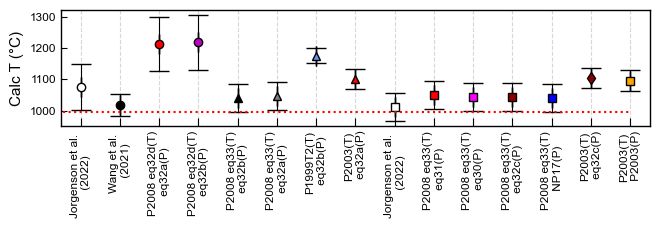

In [8]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7.6,2), sharey=True)
ms1=6
err=0
# Cpx-only thermometers with Cpx-only barometers
ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+1+err, 
             np.mean(Cpx_only_Blatter['T_Jorgenson22']-273.15), 
             yerr=72.5 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+1, Cpx_only_Blatter['T_Jorgenson22']-273.15, 'ok', ms=ms1,
         mfc='white', label='Wang et al. (2021)')

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+2+err, 
             np.mean(Cpx_only_Blatter['T_Wang21_eq2']-273.15), 
             yerr=36.6 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+2, Cpx_only_Blatter['T_Wang21_eq2']-273.15, 'ok', ms=ms1,
         mfc='k', label='Wang et al. (2021)')

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+3+err, 
             np.mean(Cpx_only_Blatter['T_Put_Teq32d_Peq32a']-273.15), 
             yerr=87 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+3, Cpx_only_Blatter['T_Put_Teq32d_Peq32a']-273.15, 'ok', ms=ms1,
         mfc='r', label='Putirka (2008) eq32d-32a')

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+4+err, 
             np.mean(Cpx_only_Blatter['T_Put_Teq32d_Peq32b']-273.15), 
             yerr=87, xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+4, Cpx_only_Blatter['T_Put_Teq32d_Peq32b']-273.15, 'ok', ms=ms1,
         mfc='m', label='Putirka (2008) eq32d-32b')

# Cpx-liq thermometers with Cpx-only barometers. 

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+5+err, 
             np.mean(P2008_eq33_eq32b['T_K_calc']-273.15), 
             yerr=45 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+5, P2008_eq33_eq32b['T_K_calc']-273.15,  '^k', ms=ms1)

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+6+err, 
             np.mean(P2008_eq33_eq32a['T_K_calc']-273.15), 
             yerr=45 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+6, P2008_eq33_eq32a['T_K_calc']-273.15, '^k', ms=ms1,
          mfc='grey')


ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+7+err, 
             np.mean(P2008_eq32b_1999T2['T_K_calc']-273.15), 
             yerr=23.8 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+7, P2008_eq32b_1999T2['T_K_calc']-273.15, '^k',ms=ms1,
          mfc='cornflowerblue')

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+8+err, 
             np.mean(P2008_eq32a_2003['T_K_calc']-273.15), 
             yerr=33 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+8, P2008_eq32a_2003['T_K_calc']-273.15,'^k', ms=ms1,
          mfc='red')

 # Cpx-liq thermometers with Cpx-Liq barometers. 

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+9+err, 
             np.mean(P_Jorg['T_K_calc']-273.15), 
             yerr=44.9 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+9, P_Jorg['T_K_calc']-273.15, 'sk', ms=ms1,
         mfc='white', label='eq33-eq31')

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+10+err, 
             np.mean(P2008_eq33_eq31['T_K_calc']-273.15), 
             yerr=45 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+10, P2008_eq33_eq31['T_K_calc']-273.15, 'sk', ms=ms1,
         mfc='red', label='eq33-eq31')

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+11+err, 
             np.mean(P2008_eq33_eq30['T_K_calc']-273.15), 
             yerr=45 , xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+11, P2008_eq33_eq30['T_K_calc']-273.15, 'sk', ms=ms1,
         mfc='magenta', label='eq33-eq30')
# ## All 32 C ones. 
ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+12+err, 
             np.mean(P2008_eq33_eq32c['T_K_calc']-273.15), 
             yerr=45, xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+12, P2008_eq33_eq32c['T_K_calc']-273.15, 'sk', ms=ms1,
         mfc='darkred', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+13+err, 
             np.mean(P2008_eq33_NP['T_K_calc']-273.15), 
             yerr=45, xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+13, P2008_eq33_NP['T_K_calc']-273.15, 'sk', ms=ms1,
         mfc='blue', label='eq33-eq30')


ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+14+err, 
             np.mean(P2003_eq32c['T_K_calc']-273.15), 
             yerr=33, xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+14, P2003_eq32c['T_K_calc']-273.15, 'dk', ms=ms1,
         mfc='darkred', label='eq33-eq30')




ax1.errorbar(np.mean(cpx_Glass['T_K_x'].loc[Blatter])*0+15+err, 
             np.mean(P2003['T_K_calc']-273.15), 
             yerr=33, xerr=0, fmt='xk', ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['T_K_x'].loc[Blatter]*0+15, P2003['T_K_calc']-273.15, 'sk', ms=ms1,
         mfc='orange', label='eq33-eq30')



    
    
ticks = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
labels=['Jorgenson et al. \n (2022)', 
'Wang et al. \n (2021)',
'P2008 eq32d(T)\n eq32a(P)',
'P2008 eq32d(T)\n eq32b(P)',


'P2008 eq33(T)\n eq32b(P)',
'P2008 eq33(T)\n eq32a(P)',
'P1999T2(T)\n eq32b(P)',
'P2003(T)\n eq32a(P)',

'Jorgenson et al. \n (2022)',
'P2008 eq33(T)\n eq31(P)',
'P2008 eq33(T)\n eq30(P)',
'P2008 eq33(T)\n eq32c(P)',
'P2008 eq33(T)\n NP17(P)',
'P2003(T)\n eq32c(P)',
'P2003(T)\n P2003(P)']


ax1.set_xticks(ticks, minor=False)
ax1.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([0.5, 8.5])





# #ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
# ax1.xaxis.grid(linestyle = '--', alpha=0.5)
# ax2.xaxis.grid(linestyle = '--', alpha=0.5)#set_tick_params(which='both', axis='both', labelbottom=True)

ax1.plot([0, 15], [cpx_Glass['T_K_x'].loc[Blatter]-273.15, cpx_Glass['T_K_x'].loc[Blatter]-273.15], ':r')

ax1.set_ylabel('Calc T (°C)')

# import matplotlib.patches as patches
# rect_UC = patches.Rectangle((0,0),10,3.1,linewidth=1,edgecolor='none',facecolor='yellow', alpha=0.1, zorder=0)
# rect_MC = patches.Rectangle((0,3.1),10,6.2-3.1,linewidth=1,edgecolor='none',facecolor='red', alpha=0.1, zorder=0)
# rect_LC = patches.Rectangle((0,6.2),10,9.3-6.2,linewidth=1,edgecolor='none',facecolor='blue', alpha=0.1, zorder=0)
# rect_M = patches.Rectangle((0, 9.3),10,13-9.3,linewidth=1,edgecolor='none',facecolor='grey', alpha=0.1, zorder=0)

# rect_UC2 = patches.Rectangle((-1,0),10,3.1,linewidth=1,edgecolor='none',facecolor='yellow', alpha=0.1, zorder=0)
# rect_MC2 = patches.Rectangle((-1,3.1),10,6.2-3.1,linewidth=1,edgecolor='none',facecolor='red', alpha=0.1, zorder=0)
# rect_LC2 = patches.Rectangle((-1,6.2),10,9.3-6.2,linewidth=1,edgecolor='none',facecolor='blue', alpha=0.1, zorder=0)
# rect_M2 = patches.Rectangle((-1, 9.3),10,13-9.3,linewidth=1,edgecolor='none',facecolor='grey', alpha=0.1, zorder=0)

# ## Adding crustal bars
# ax1.add_patch(rect_UC)
# ax1.add_patch(rect_MC)
# ax1.add_patch(rect_LC)
# ax1.add_patch(rect_M)
# ax1.set_ylim([0, 13])
# ## Adding crustal bars
# ax2.add_patch(rect_UC2)
# ax2.add_patch(rect_MC2)
# ax2.add_patch(rect_LC2)
# ax2.add_patch(rect_M2)
ax1.set_xlim([0.5, 15.5])
ax1.xaxis.grid(linestyle = '--', alpha=0.5)
# ax2.set_ylim([0, 20])
plt.subplots_adjust(bottom=0.3, wspace=0.4)
fig.savefig('Blatter_Temp_Exp_Comparison1.png', dpi=300, bbox_inches='tight')